In [1]:
# data from: https://arcticdata.io/catalog/view/doi%3A10.18739%2FA2FT8DK8Z
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import csv

wl_4b = np.asarray([490, 565, 665, 865])
wl_8b = np.asarray([443, 490 ,531 ,565, 610, 665, 705, 865])

In [2]:
def plot_spectra(df, title):
    plt.figure(figsize=(12,6))
    # get the wavelengths from the first column
    wl = df.iloc[:, 0]
    # Loop through the rest of the columns (y-values) and plot them
    for col_name in df.columns[1:]:
        y_values = df[col_name]
        plt.plot(wl, y_values, label=col_name)
    for wl_val in wl_4b:
        plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.25)
    for wl_val in wl_8b:
        plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.25)
    # Add labels and legend to the plot
    plt.xlabel("Reflectance")
    plt.ylabel("Wavelength (nm)")
    plt.grid(True)
    plt.title(title)
    #plt.legend()
    # Show the plot
    plt.show()

def find_row_with_wavelengths(csv_file_path):
    with open(csv_file_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for index, row in enumerate(reader):
            if 'Wavelengths' in row:
                return index

class spectral_library:
  def __init__(self, wl):
    self.spectra = np.zeros((0))
    self.spectra8b = np.zeros((0))
    self.spectra4b = np.zeros((0))
    self.wl = wl
    self.wl8b = np.asarray([443, 490 ,531 ,565, 610, 665, 705, 865])
    self.wl4b = np.asarray([490, 565, 665, 865])
    self.nBands = len(wl)
    self.nSpec = 0
    self.names = []
  def add(self, spec, name=''): 
    if len(self.spectra) == 0:
        self.spectra = spec
    else:
        self.spectra = np.row_stack((self.spectra, spec))
    self.names.append(name)
    self.nSpec = self.nSpec + 1
  def resample_planet8b(self):
    self.spectra8b = np.zeros((self.nSpec,8))
    band_ranges = [[431,451],[465,515],[513,549],[547,583],[600,620],[650,682],[697,713],[845,885]]
    for spec_idx in range(self.nSpec):
        for band_idx in range(8):
            low = band_ranges[band_idx][0]
            high = band_ranges[band_idx][1]
            val = 0
            count = 0
            idx_list = np.where((self.wl>low)*(self.wl<high))
            #print(idx_list)
            for i in idx_list[0]:
                #print(spec_idx)
                #print(i)
                #print(np.isfinite(self.spectra[spec_idx,i]))
                if np.isfinite(self.spectra[spec_idx,i]):
                    val = val + self.spectra[spec_idx,i]
                    count = count + 1
            if count>0:
                self.spectra8b[spec_idx,band_idx] = val/count
            else:
                self.spectra8b[spec_idx,band_idx] = np.NaN


In [3]:
current_directory = os.getcwd()
csv_files = glob.glob(os.path.join(current_directory, "data\SpectralAlbedoData\*.csv"))

# get the wavelengths:
idx = find_row_with_wavelengths(csv_files[0])
df = pd.read_csv(csv_files[0], header=idx)
wl = df.iloc[:, 0]
sli = spectral_library(wl)

# Iterate through each CSV file and perform the desired operations
for csv_file in csv_files:
    if csv_file[-3:]=='csv':
        # read the spectra into a dataframe
        idx = find_row_with_wavelengths(csv_file)
        df = pd.read_csv(csv_file, header=idx)
        # add to the spectral library
        for col_name in df.columns[1:]:
            sli.add(df[col_name], name=col_name)
        #plot_spectra(df, csv_file[csv_file.rfind('\\'):])


KeyboardInterrupt



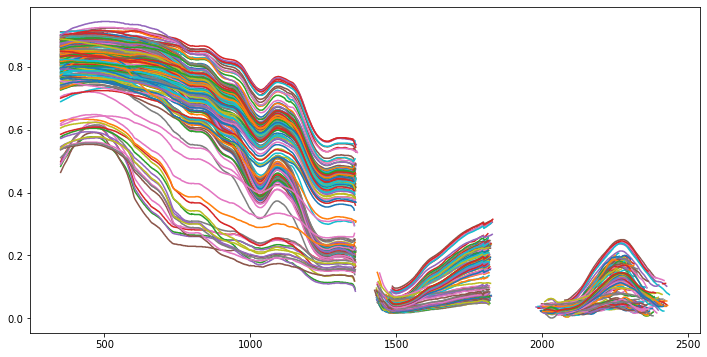

In [4]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra[idx,:]
    plt.plot(wl, y_values, label=sli.names[idx])
for wl_val in wl_4b:
    plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.15)
for wl_val in wl_8b:
    plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.15)
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
plt.title('Artic Ice and Water Spectra')
#plt.legend()
# Show the plot
plt.show()

In [5]:
sli.resample_planet8b()

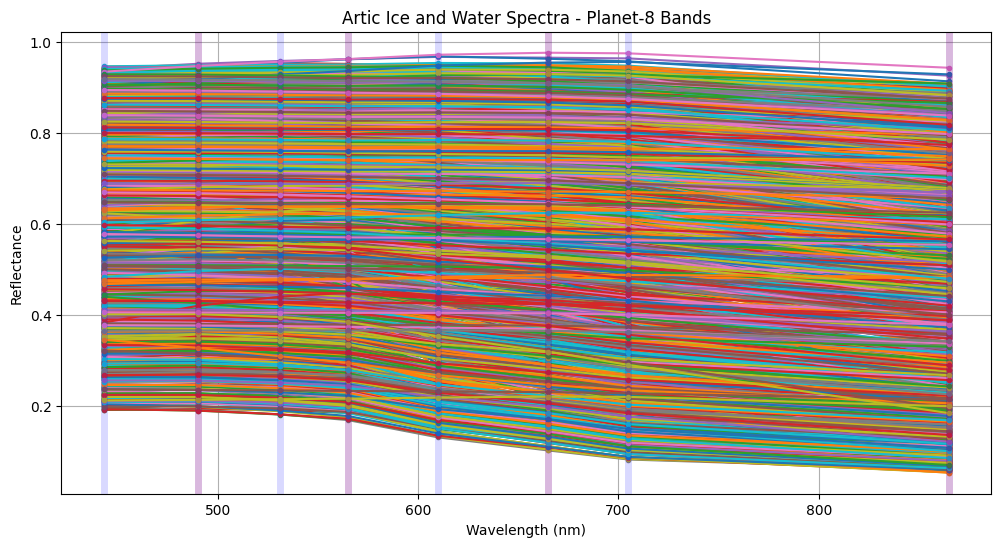

In [212]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra8b[idx,:]
    plt.plot(sli.wl8b, y_values, label=sli.names[idx], marker='.')
for wl_val in wl_4b:
    plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.15)
for wl_val in wl_8b:
    plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.15)
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
plt.title('Artic Ice and Water Spectra - Planet-8 Bands')
#plt.legend()
# Show the plot
plt.show()

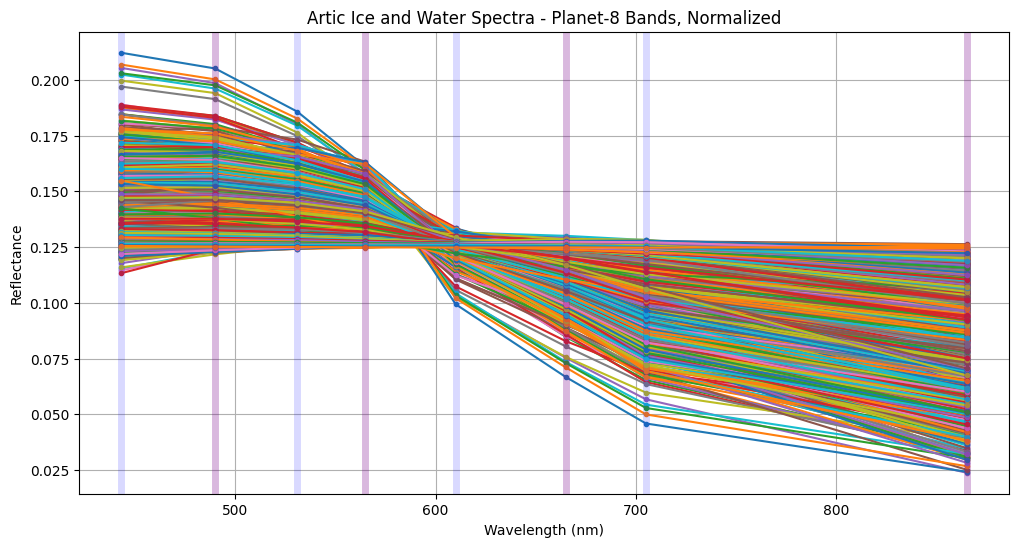

In [213]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra8b[idx,:]
    plt.plot(sli.wl8b, y_values/np.sum(y_values), label=sli.names[idx], marker='.')
for wl_val in wl_4b:
    plt.axvline(x = wl_val, color = 'r', linewidth=5, alpha=0.15)
for wl_val in wl_8b:
    plt.axvline(x = wl_val, color = 'b', linewidth=5, alpha=0.15)
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
plt.title('Artic Ice and Water Spectra - Planet-8 Bands, Normalized')
#plt.legend()
# Show the plot
plt.show()

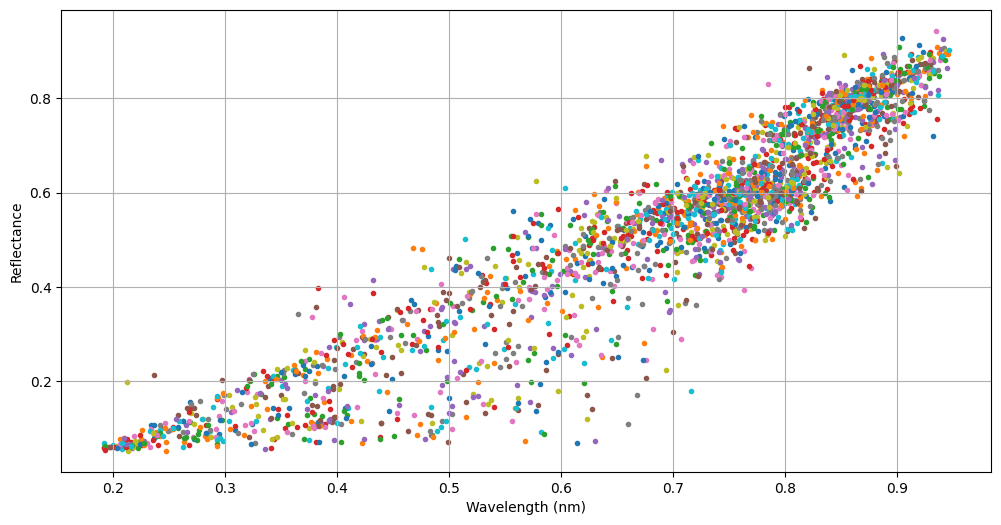

In [214]:
plt.figure(figsize=(12,6))
# Loop through the rest of the columns (y-values) and plot them
for idx in range(sli.nSpec):
    y_values = sli.spectra8b[idx,:]
    plt.scatter(y_values[0],y_values[7], label=sli.names[idx], marker='.')
# Add labels and legend to the plot
plt.ylabel("Reflectance")
plt.xlabel("Wavelength (nm)")
plt.grid(True)
#plt.legend()
# Show the plot
plt.show()

In [6]:
data = sli.spectra8b[~np.isnan(sli.spectra8b),:]
pca = PCA()
pca.fit(data)
pca_spec = pca.transform(data)
plt.scatter(pca_spec[0,:],pca_spec[1,:], marker='.')

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [7]:
sli.nSpec, sli.nBands

(2712, 2151)

In [8]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

2388969
(2712, 2151)
0


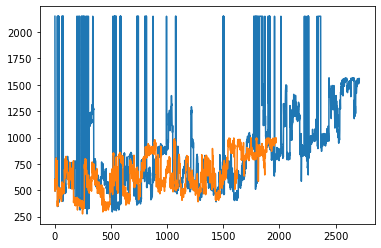

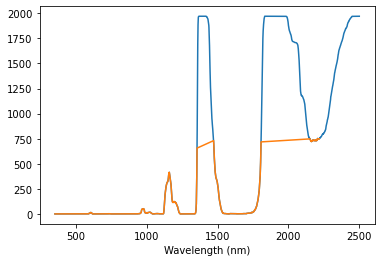

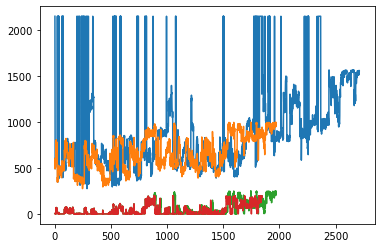

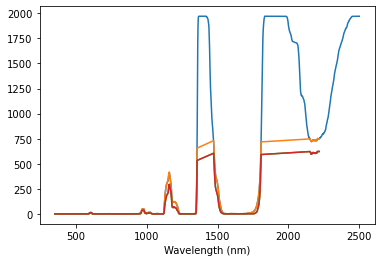

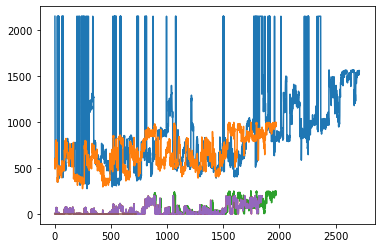

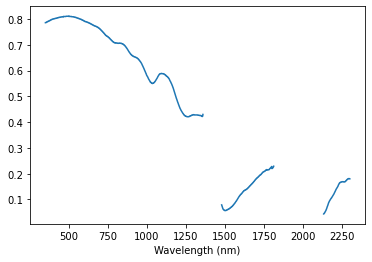

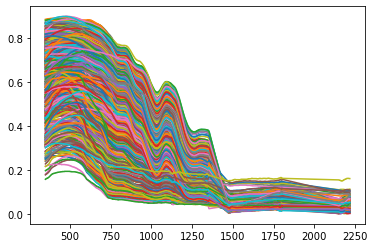

In [9]:
nan_mask = np.isnan(sli.spectra) 
nRows, nCols = nan_mask.shape
row_idx = np.arange(nRows)
col_idx = np.arange(nCols)
print(np.sum(nan_mask))
print(nan_mask.shape)

# reducing number of spectra
col_sum1 = np.sum(nan_mask, axis=1)
nan_mask = nan_mask[col_sum1<1000,:]
row_idx = row_idx[col_sum1<1000]
col_sum2 = np.sum(nan_mask, axis=1)
plt.figure()
plt.plot(col_sum1)
plt.plot(col_sum2)

# reducing number of bands
row_sum1 = np.sum(nan_mask, axis=0)
nan_mask = nan_mask[:,row_sum1<750]
col_idx = col_idx[row_sum1<750]
row_sum2 = np.sum(nan_mask, axis=0)
plt.figure()
plt.plot(wl,row_sum1)
wl2 = wl[row_sum1<750]
plt.plot(wl2,row_sum2)
plt.xlabel("Wavelength (nm)")

# reducing number of spectra
col_sum3 = np.sum(nan_mask, axis=1)
nan_mask = nan_mask[col_sum3<200,:]
row_idx = row_idx[col_sum3<200]
col_sum4 = np.sum(nan_mask, axis=1)
plt.figure()
plt.plot(col_sum1)
plt.plot(col_sum2)
plt.plot(col_sum3)
plt.plot(col_sum4)

# reducing number of bands
row_sum3 = np.sum(nan_mask, axis=0)
nan_mask = nan_mask[:,row_sum3<750]
col_idx = col_idx[row_sum3<750]
row_sum4 = np.sum(nan_mask, axis=0)
plt.figure()
plt.plot(wl,row_sum1)
plt.plot(wl2,row_sum2)
plt.plot(wl2,row_sum3)
wl3 = wl2[row_sum3<750]
plt.plot(wl3,row_sum4)
plt.xlabel("Wavelength (nm)")

# reducing number of spectra
col_sum5 = np.sum(nan_mask, axis=1)
nan_mask = nan_mask[col_sum5<1,:]
row_idx = row_idx[col_sum5<1]
col_sum6 = np.sum(nan_mask, axis=1)
plt.figure()
plt.plot(col_sum1)
plt.plot(col_sum2)
plt.plot(col_sum3)
plt.plot(col_sum4)
plt.plot(col_sum5)
plt.plot(col_sum6)

plt.figure()
plt.plot(wl,sli.spectra[100,:]);
plt.xlabel("Wavelength (nm)")

print(np.sum(nan_mask))
data = sli.spectra[row_idx,:]
data = data[:,col_idx]
plt.figure()
plt.plot(wl3,data.T);

In [10]:
print(data.shape) 

############ IS THIS 720 WAVELENGTHS WITH 1404 ALBEDOS? #######################

pca = PCA(whiten=True, n_components=10)
pca.fit(data)
pca_spec = pca.transform(data).T
print(pca_spec.shape)

########## IS PCA THE BEST METHOD TO USE? ##################
########## SHOULD WE TRY OTHER NON-LINEAR METHODS LIKE ISOMAP OR LLE? #################


(720, 1404)
(10, 720)


In [50]:
print(data[3,:])

[0.464 0.466 0.468 ... 0.072 0.072 0.073]


In [26]:
print(pca_spec)

[[ 0.96292473  0.83383875  0.92412064 ... -0.55724485  1.53389223
   1.69011094]
 [ 0.8653399   0.88516673  0.6267475  ...  2.46997552  2.45941575
   1.43280063]
 [ 2.48710199  2.79639332  2.99080829 ... -0.29690669  0.73623901
  -1.09537665]
 ...
 [ 4.22345161  4.27277755  4.81307917 ...  0.28982719 -1.9440318
   2.15131775]
 [ 0.10800919 -1.73674497  0.23171737 ... -2.57450178 -3.76010293
   0.09856844]
 [ 0.05042871  1.73315374  0.56770387 ...  1.08383282  1.853882
   0.23434999]]


In [52]:
# Access the principal components
principal_components = pca.components_

print(principal_components[0,:])
print(principal_components.shape)

# Magnitude of Values: The magnitude of the values in a principal component's vector indicates the 
# strength of the relationship between the original features and that particular principal component. 
# Larger magnitudes suggest stronger contributions from those features.


[-0.03401141 -0.03398148 -0.03395176 ...  0.00031747  0.00029732
  0.00027329]
(10, 1404)


In [28]:
print(principal_components.shape[1])

1404


In [46]:
################ THESE FEATURES HAVE THE STRONGEST RELATIONSHIP WITH PCA_0. ###################
################ I THINK THESE ARE ALBEDO COLUMNS FROM CSV FILES? ################

for i in range((principal_components.shape[1])):
    if principal_components[0,i]>0.00156:
        print (i, principal_components[0,i])

1036 0.0015606821691156849
1037 0.0015623837272355366
1039 0.0015653265881531626
1040 0.0015646437929961036
1041 0.0015662765350827857
1042 0.001562325613594995
1043 0.0015634154025225958
1044 0.0015612765165712614


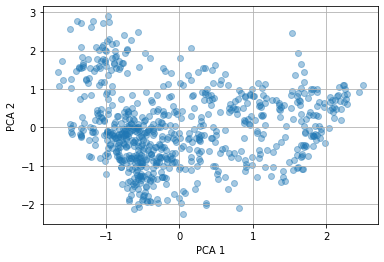

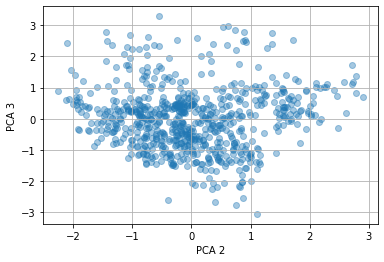

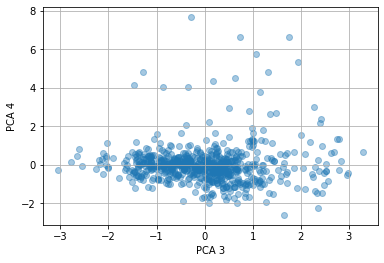

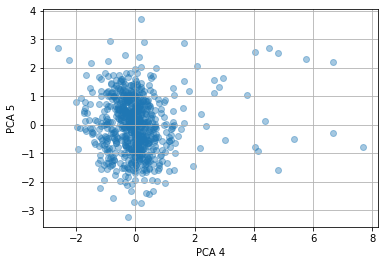

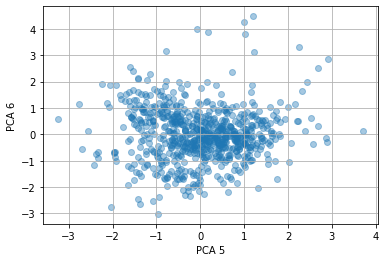

In [11]:
plt.figure()
plt.scatter(pca_spec[0,:],pca_spec[1,:], alpha=0.4)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[1,:],pca_spec[2,:], alpha=0.4)
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[2,:],pca_spec[3,:], alpha=0.4)
plt.xlabel('PCA 3')
plt.ylabel('PCA 4')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[3,:],pca_spec[4,:], alpha=0.4)
plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
plt.grid(True)
plt.figure()
plt.scatter(pca_spec[4,:],pca_spec[5,:], alpha=0.4)
plt.xlabel('PCA 5')
plt.ylabel('PCA 6')
plt.grid(True)

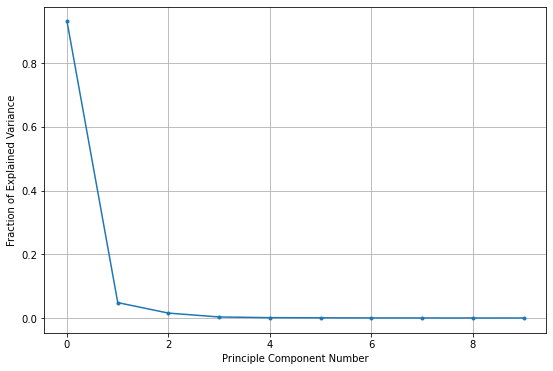

In [12]:
plt.figure(figsize=(9,6))
plt.plot(pca.explained_variance_ratio_, marker='.')
plt.xlabel('Principle Component Number')
plt.ylabel('Fraction of Explained Variance')
plt.grid(True)

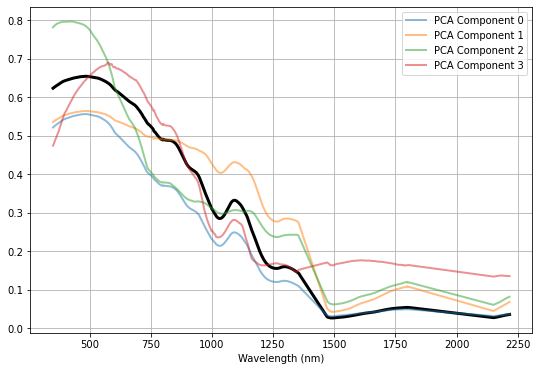

In [13]:
plt.figure(figsize=(9,6))
plt.plot(wl3, pca.mean_, 'k', linewidth=3)
for i in range(4):
    #note: I am multiplying by 2 to see the variation in the PCS better 
    plt.plot(wl3, pca.mean_ + 3*pca.components_[i,:], linewidth=2, label='PCA Component '+str(i), alpha=0.5)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.legend();

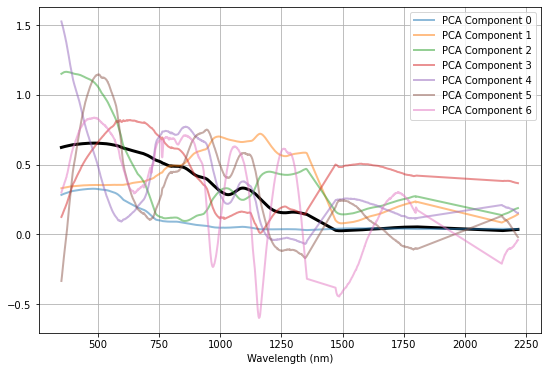

In [22]:
plt.figure(figsize=(9,6))
plt.plot(wl3, pca.mean_, 'k', linewidth=3)
for i in range(7):
    #note: I am multiplying by 2 to see the variation in the PCS better 
    plt.plot(wl3, pca.mean_ + 10*pca.components_[i,:], linewidth=2, label='PCA Component '+str(i), alpha=0.5)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.legend();

## Manifold Learning

In [14]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, #lda,
                     random_projection)

### Needed to remove lda from sklearn due to error -- add back in later? ###


In [15]:
digits = datasets.load_digits(n_class=6)
Xd = digits.data
yd = digits.target

print(Xd.shape)
print(yd.shape)

#n_samples, n_features = X.shape
#n_neighbors = 30


(1083, 64)
(1083,)


In [58]:
sli.resample_planet8b()

X = sli.spectra8b
y = np.arange(X.shape[0])

print(X.shape)
print(y.shape)

(2712, 8)
(2712,)


In [15]:

X = data
y = np.arange(X.shape[0])

print(X.shape)
print(y.shape)

(720, 1404)
(720,)


In [18]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),  ####################### UPDATE THIS #####################
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):  ####################### UPDATE THIS ########################
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X.images[i], cmap=plt.cm.gray_r),  ##################### UPDATE THIS ###################
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


In [56]:
#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(6,6))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


ValueError: cannot reshape array of size 1404 into shape (8,8)

Computing random projection


AttributeError: 'numpy.ndarray' object has no attribute 'images'

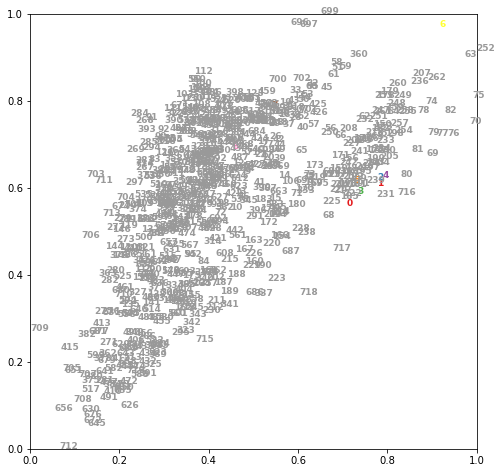

In [19]:
#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")


Computing Isomap embedding
Done.


AttributeError: 'numpy.ndarray' object has no attribute 'images'

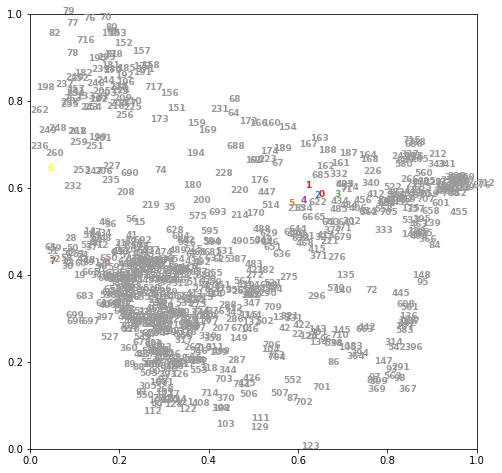

In [20]:
#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))
